<a href="https://colab.research.google.com/github/tashmansara-dotcom/final-project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading and reading data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


aisles=pd.read_csv('/content/aisles.csv')
print('aisles:',aisles.shape)
departments=pd.read_csv('/content/departments.csv')
print('departments:',departments.shape)
orders=pd.read_csv('/content/orders.csv')
print('orders:',orders.shape)
products=pd.read_csv('/content/products.csv')
print('products:',products.shape)
order_products_train=pd.read_csv('/content/order_products__train.csv')
print('order_products_train:',order_products_train.shape)
order_products_prior=pd.read_csv('/content/order_products__prior.csv')
print('order_products_prior:',order_products_prior.shape)
aisles.drop([5,99],inplace=True)
print(aisles.head(10))
aisles=pd.get_dummies(aisles, columns=['aisle'])
departments.drop([1,20],inplace=True)
print(departments)
departments=pd.get_dummies(departments, columns=['department'])
print(departments)
order_products_prior.head(10)
print(order_products_prior.duplicated().any())
print(order_products_prior.isnull().sum())
print(order_products_train.duplicated().any())
print(order_products_train.isnull().sum())
print(orders.duplicated().any())
print(orders.isnull().sum())
print(products.duplicated().any())
print(products.isnull().sum())
num_attr=["days_since_prior_order"]
num_pipeline=Pipeline([
   ('imputer',SimpleImputer(strategy='median')),
   ('std_scaler',StandardScaler())
])
num_attr=["days_since_prior_order"]
preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attr)
])

orders=preprocessing.fit_transform(orders)
orders=pd=pd.DataFrame(orders,columns=num_attr)
print(orders)



aisles: (134, 2)
departments: (21, 2)
orders: (1869744, 7)
products: (49688, 4)
order_products_train: (1384617, 4)
order_products_prior: (5876262, 4)
    aisle_id                       aisle
0          1       prepared soups salads
1          2           specialty cheeses
2          3         energy granola bars
3          4               instant foods
4          5  marinades meat preparation
6          7               packaged meat
7          8             bakery desserts
8          9                 pasta sauce
9         10            kitchen supplies
10        11            cold flu allergy
    department_id       department
0               1           frozen
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11            

exploring data

<bound method DataFrame.info of           order_id user_id eval_set  order_number  order_dow  \
0        2539329.0     1.0    prior           1.0        2.0   
1        2398795.0     1.0    prior           2.0        3.0   
2         473747.0     1.0    prior           3.0        3.0   
3        2254736.0     1.0    prior           4.0        4.0   
4         431534.0     1.0    prior           5.0        4.0   
...            ...     ...      ...           ...        ...   
6703483    2266710  206209    prior          10.0        5.0   
6703484    1854736  206209    prior          11.0        4.0   
6703485     626363  206209    prior          12.0        1.0   
6703486    2977660  206209    prior          13.0        1.0   
6703487     272231  206209    train          14.0        6.0   

         order_hour_of_day  days_since_prior_order  
0                      8.0                     NaN  
1                      7.0                    15.0  
2                     12.0              

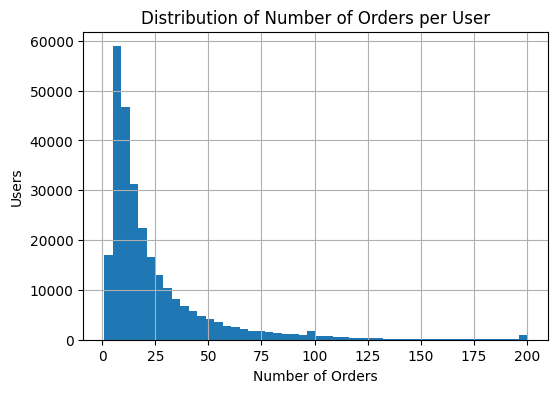

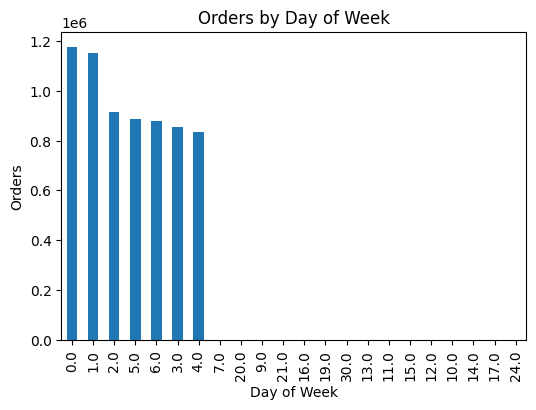

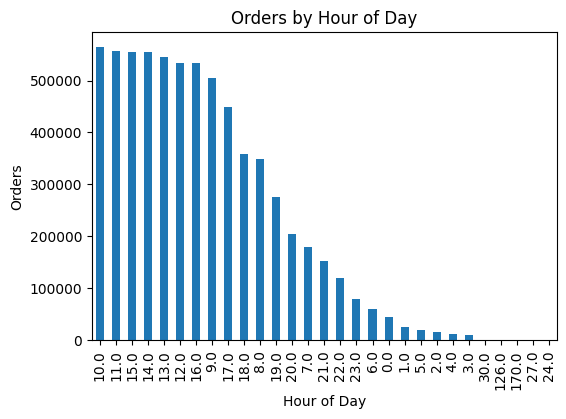

In [ ]:
import matplotlib.pyplot as plt


print(orders.info)
print(orders.describe())
print(orders.isnull().sum)
user_orders=orders['user_id'].value_counts()
print(user_orders.head())
user_orders.hist(bins=50,figsize=(6,4))
plt.title("Distribution of Number of Orders per User")
plt.xlabel("Number of Orders")
plt.ylabel("Users")
plt.show()
dow_counts=orders['order_dow'].value_counts()
plt.figure(figsize=(6,4))
dow_counts.plot(kind='bar')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Orders")
orders_hour=orders['order_hour_of_day'].value_counts()
plt.figure(figsize=(6,4))
orders_hour.plot(kind='bar')
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Orders")
plt.show()



cleaning data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
aisles=pd.read_csv('/content/aisles.csv')
departments=pd.read_csv('/content/departments.csv')
orders=pd.read_csv('/content/orders.csv')
onehotencoder=OneHotEncoder()

aisles.drop([5,99],inplace=True)
print(aisles.head(10))
aisles=pd.get_dummies(aisles, columns=['aisle'])
departments.drop([1,20],inplace=True)
print(departments)
departments=pd.get_dummies(departments, columns=['department'])
print(departments)
order_products_prior.head(10)
print(order_products_prior.duplicated().any())
print(order_products_prior.isnull().sum())
print(order_products_train.duplicated().any())
print(order_products_train.isnull().sum)
print(orders.duplicated().any())
print(orders.isnull().sum())
print(products.duplicated().any())
print(products.isnull().sum())
le=LabelEncoder()
orders['eval_set']=le.fit_transform(orders['eval_set'])

num_attr=["days_since_prior_order"]
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

preprocessing=ColumnTransformer([
   ("num",num_pipeline,num_attr)
])

orders=preprocessing.fit_transform(orders)
orders=pd.DataFrame(orders,columns=num_attr)
print(orders)
order_products__prior=order_products_prior.dropna()
print(order_products__prior.isnull().sum())
le=LabelEncoder()
order_products__prior['reordered']=le.fit_transform(order_products__prior['reordered'])


    aisle_id                       aisle
0          1       prepared soups salads
1          2           specialty cheeses
2          3         energy granola bars
3          4               instant foods
4          5  marinades meat preparation
6          7               packaged meat
7          8             bakery desserts
8          9                 pasta sauce
9         10            kitchen supplies
10        11            cold flu allergy
    department_id       department
0               1           frozen
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       

/tmp/ipython-input-2227800362.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_products__prior['reordered']=le.fit_transform(order_products__prior['reordered'])


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=order_products_prior.merge(orders,on="order_id",how="left")
df=df.merge(products,on="product_id",how="left")
df=df.merge(aisles,on="aisle_id",how="left")
df=df.merge(departments,on="department_id",how="left")
user_orders_count = orders['user_id'].value_counts()
total_items_per_user = df['user_id'].value_counts()
reordered_count_per_user = df[df['reordered']==1]['user_id'].value_counts()
user_features = pd.DataFrame({
    'user_id': user_orders_count.index,
    'user_orders_count': user_orders_count.values
})
user_features = user_features.merge(
    pd.DataFrame({
        'user_id': total_items_per_user.index,
        'total_items_count': total_items_per_user.values
    }),
    on='user_id',
    how='left'
)

user_features = user_features.merge(
    pd.DataFrame({
        'user_id': reordered_count_per_user.index,
        'reordered_items_count': reordered_count_per_user.values
    }),
    on='user_id',
    how='left'
)

user_features['basket_size'] = user_features['total_items_count'] / user_features['user_orders_count']
user_features['reordered_ratio'] = user_features['reordered_items_count'] / user_features['total_items_count']
user_features.fillna(0, inplace=True)
df = df.merge(user_features[['user_id', 'user_orders_count', 'basket_size', 'reordered_ratio']], on='user_id', how='left')
df['days_since_prior_order'].fillna(df['days_since_prior_order'].median(), inplace=True)
df.dropna(subset=['user_id', 'order_id'], inplace=True)
numerical_features = [
    'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
    'add_to_cart_order', 'user_orders_count', 'basket_size', 'reordered_ratio'
]

features_for_X = numerical_features


X = df[features_for_X]
y = df['reordered']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipython-input-2258879141.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prior_order'].fillna(df['days_since_prior_order'].median(), inplace=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import cross_val_score
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("the rmse is",rmse)
tree_rmse=-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=10)





In [ ]:
import matplotlib.pyplot as plt
X_g=np.arange(X.min(),X.max(),0.01)
X_g=X_g.reshape((len(X_g),1))
y_pred_g=model.predict(X_g)
plt.figure(figsize=(6,4))
plt.scatter(X_test,y_test,color='red',label=('Actual Data'))
plt.plot(X_g, y_pred_g, color='blue', linewidth=2, label=('Predicted '))
plt.title(' decision tree classifier')
plt.xlabel('basket size')
plt.ylabel('reordered')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))
mse = mean_squared_error(y_test, y_pred)
print("mse is",mse)
rmse = np.sqrt(mse)
print("rmse is",rmse)

forest_rmse=-cross_val_score(regressor,X,y,scoring="neg_mean_squared_error",cv=10)



In [ ]:
import matplotlib.pyplot as plt
X_g = np.arange(min(X), max(X), 0.01)
X_g = X_g.reshape((len(X_g), 1))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_g, regressor.predict(X_g), color='blue', label='Predicted ')
plt.title('random forest regression')
plt.xlabel('basket size')
plt.ylabel('reordered')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [50,100,150],
     'max_features': [5,10,15]}]
regressosr=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(regressor,param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)





In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'n_estimators':randint(low =2,high=60),
                'max_features';randint(low=2,high=20)}
regressor=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(regressor,param_distributions=param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error')
rnd_search.fit(X_train,y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
imprt matplotlib.pyplot as plt
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_scaled,y_train)
y_pred = knn_clf.predict(X_test_scaled)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
X_real = X_test.values
y_real=y_test.values
xx, yy = np.meshgrid(
    np.linspace(X_real[:, 0].min(), X_real[:, 0].max(), 200),
    np.linspace(X_real[:, 1].min(), X_real[:, 1].max(), 200)
)
Z = knn_clf.predict(
    scaler.transform(np.c_[xx.ravel(), yy.ravel()])
).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(
    X_real[:, 0],
    X_real[:, 1],
    c=y_real,
    cmap='viridis',
    edgecolor='k',
    s=70
)

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("KNN Decision Boundary (Test Set Only)")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
k_values = [1, 7, 15]
plt.figure(figsize=(18, 5))

X_real = X_test.values
Y_real = y_test.values
xx, yy = np.meshgrid(
    np.linspace(X_real[:, 0].min(), X_real[:, 0].max(), 300),
    np.linspace(X_real[:, 1].min(), X_real[:, 1].max(), 300)
)

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    Z = knn.predict(
        scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    ).reshape(xx.shape)
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(
        X_real[:, 0],
        X_real[:, 1],
        c=Y_real,
        cmap='viridis',
        edgecolor='k',
        s=70
    )

    plt.title(f"KNN Decision Boundary (k = {k})")
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc}")
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value in KNN")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
k=3
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train_scaled, y_train)
y_pred = knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Regression (k={k})")
print("MSE =", mse)
print("RMSE =", rmse)
print("R² Score =", r2)
import matplotlib.pyplot as plt
X_test_real = X_test.values
X_grid = np.linspace(X_test_real.min()-1, X_test_real.max()+1, 500).reshape(-1,1)
y_pred_grid = knn_reg.predict(scaler.transform(X_grid))
plt.figure(figsize=(8,5))
plt.scatter(X_test_real, y_test, color='green', label='Test Actual Data')
plt.plot(X_grid, y_pred_grid, color='blue', linewidth=2, label='Predicted Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'KNN Regression (k={k}) - Test Visualization')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
k_values = [1, 3, 15]
mse_scores = []
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"K = {k} → MSE = {mse_scores[-1]:.2f}, R² = {r2_scores[-1]:.4f}")
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs K in KNN Regression")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.xlabel("K Value")
plt.ylabel("R² Score")
plt.title("R² vs K in KNN Regression")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
X_train_real = scaler.inverse_transform(X_train)
X_test_real = scaler.inverse_transform(X_test)
X_plot_real = np.linspace(
    X_train_real.min() - 1,
    X_train_real.max() + 1,200).reshape(-1, 1)
plt.figure(figsize=(18, 5))
for i, k in enumerate(k_values, 1):

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_plot = model.predict(scaler.transform(X_plot_real)
    plt.subplot(1, 3, i)

    plt.scatter(X_test_real, y_test, color='blue', label='Actual Salary')
    plt.plot(X_plot_real, y_plot, color='red', label=f"K = {k}")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.title(f"KNN Regression Prediction (K = {k})")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()
